In [ ]:
# 5DATA002W.2 Machine Learning & Data Mining
# Coursework - Python Notebook 2: Classification Modelling and Hyperparameters Tunning
# Author: Madana Madana (Ravindi Madana)
# Peer Reviewer: Senuri Hansamini Wedamulla
# Review Date: 11.03.2025

In [ ]:
#This code from code reuse session 2 pt 1
#Import pandas library
import pandas as pd

In [ ]:
#This code from code reuse session 2 pt 1
#import numpy library
import numpy as np

In [ ]:
#This code from code reuse session 2 pt 5
#Use the method to control truncating rowa and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [ ]:
#This code from code reuse session 2 pt 2
#Load the classification dataset prepared in Notebook 1
classification_data = pd.read_csv('/content/drive/MyDrive/ML_Coursework_w2082268/classification_dataset.csv')

In [ ]:
#This code from code reuse session 2 pt 3
#show first 15 row of dataset
classification_data.head(15)

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,0,0,1,2,3,0,4,1,1,24,1,60,1
1,50,1,1,3,1,2,0,35,1,1,14,5,62,1
2,58,2,2,5,1,2,0,63,1,1,14,7,75,1
3,58,0,0,1,2,3,0,18,1,1,2,1,84,1
4,47,1,0,2,2,3,0,41,1,1,3,1,50,1
5,51,0,0,1,1,2,0,20,1,1,18,2,89,1
6,51,0,0,1,0,1,0,8,1,1,11,1,54,1
7,40,1,0,2,1,2,0,30,1,1,9,1,14,0
8,40,3,2,5,2,3,0,103,1,1,20,18,70,1
9,69,3,2,5,0,1,1,32,1,1,21,12,92,1


In [ ]:
#This code from code reuse session 2 pt 4
#Check data types
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4020 non-null   int64
 1   T_Stage                 4020 non-null   int64
 2   N_Stage                 4020 non-null   int64
 3   6th_Stage               4020 non-null   int64
 4   Differentiated          4020 non-null   int64
 5   Grade                   4020 non-null   int64
 6   A_Stage                 4020 non-null   int64
 7   Tumor_Size              4020 non-null   int64
 8   Estrogen_Status         4020 non-null   int64
 9   Progesterone_Status     4020 non-null   int64
 10  Regional_Node_Examined  4020 non-null   int64
 11  Regional_Node_Positive  4020 non-null   int64
 12  Survival_Months         4020 non-null   int64
 13  Mortality_Status        4020 non-null   int64
dtypes: int64(14)
memory usage: 439.8 KB


In [ ]:
#This code from code reuse session 2 pt 6
#Define input features (X) and target variable (y)
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
                'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
                'Regional_Node_Examined', 'Regional_Node_Positive']
X = classification_data[feature_cols]  # Features
y = classification_data['Mortality_Status']  # Target variable

In [ ]:
#This code from code reuse session 2 pt 7
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
#This code from code reuse session 2 pt 8
#Split data into training and testing sets with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 2814 samples
Testing set size: 1206 samples


In [ ]:
# MODEL 1: LOGISTIC REGRESSION
# This code from code reuse session 2 pt 9
# Import Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

In [ ]:
# This code from code reuse session 2 pt 10
# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

In [ ]:
# This code from code reuse session 2 pt 11
# Train the Logistic Regression model using training data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# This code from code reuse session 2 pt 12
# Make predictions on training data
y_pred_train = logreg.predict(X_train)

In [ ]:
# This code from code reuse session 2 pt 13
# Make predictions on test data
y_pred_test = logreg.predict(X_test)

In [ ]:
# This code from code reuse session 2 pt 14
# Compare actual and predicted test values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
comparison_df.head()

,Actual,Predicted
505,1,1
3163,1,1
1401,1,1
3205,1,1
634,1,1


In [ ]:
# This code from code reuse session 2 pt 15
# Calculate training accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.8606965174129353


In [ ]:
# This code from code reuse session 2 pt 16
# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.8482587064676617


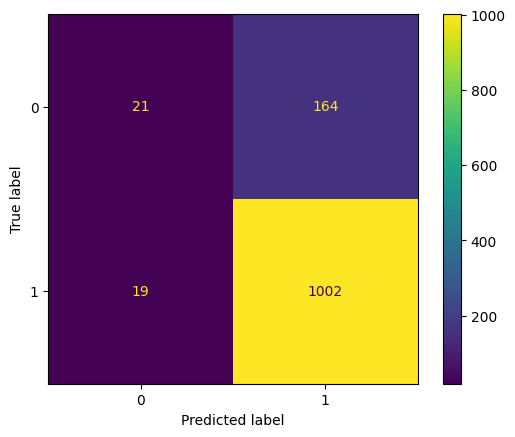

In [ ]:
# This code from code reuse session 2 pt 17
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
# This code from code reuse session 2 pt 18
# Generate classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.11      0.19       185
           1       0.86      0.98      0.92      1021

    accuracy                           0.85      1206
   macro avg       0.69      0.55      0.55      1206
weighted avg       0.81      0.85      0.80      1206



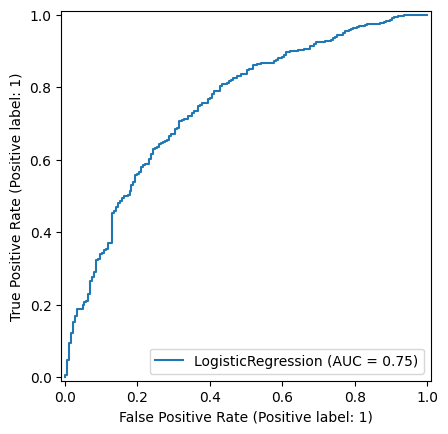

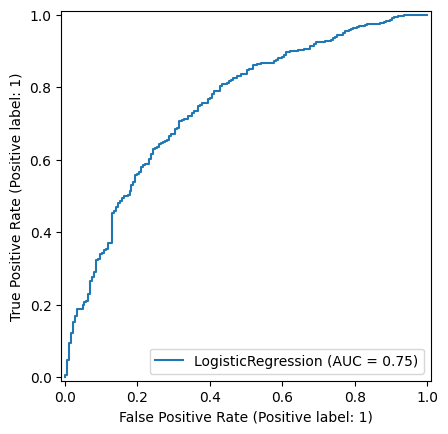

In [ ]:
# This code from code reuse session 2 pt 19
# Generate ROC curve
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
roc_display.plot()

In [ ]:
# This code from code reuse session 2 pt 20
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# This code from code reuse session 2 pt 21
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# This code from code reuse session 2 pt 22
# Train KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# This code from code reuse session 2 pt 23
# Predict with KNN model
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", knn_accuracy)

KNN Test Accuracy: 0.824212271973466


In [ ]:
# This code from code reuse session 2 pt 27
# Import and train Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8482587064676617
Recall: 0.9813907933398629
Precision: 0.8593481989708405
F1 Score: 0.9163237311385459
AUC-ROC: 0.749180718426556
Confusion Matrix:
 [[  21  164]
 [  19 1002]]


In [ ]:
# Predict
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.824212271973466
Recall: 0.9559255631733594
Precision: 0.8538932633420823
F1 Score: 0.9020332717190388
AUC-ROC: 0.6002488286523546
Confusion Matrix:
 [[ 18 167]
 [ 45 976]]


In [ ]:
# Predict
y_pred = nb.predict(X_test)
y_proba = nb.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7910447761194029
Recall: 0.8579823702252694
Precision: 0.8911495422177009
F1 Score: 0.874251497005988
AUC-ROC: 0.7226142891177172
Confusion Matrix:
 [[ 78 107]
 [145 876]]


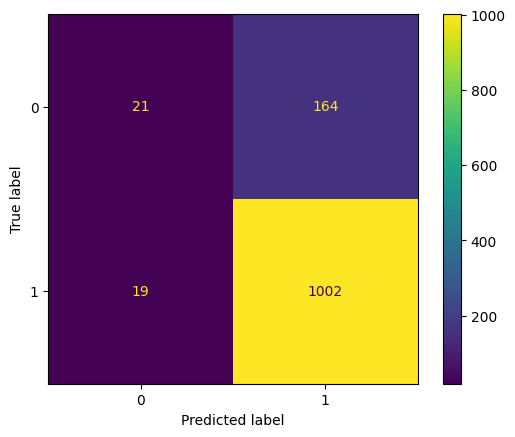

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.53      0.11      0.19       185
           1       0.86      0.98      0.92      1021

    accuracy                           0.85      1206
   macro avg       0.69      0.55      0.55      1206
weighted avg       0.81      0.85      0.80      1206



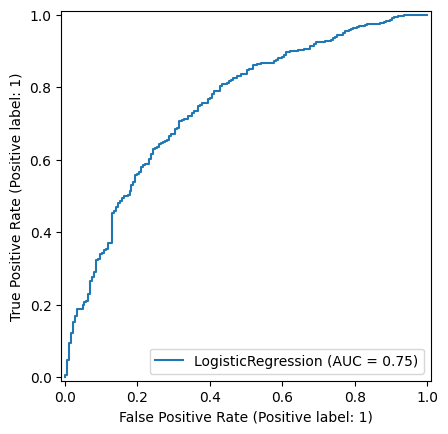

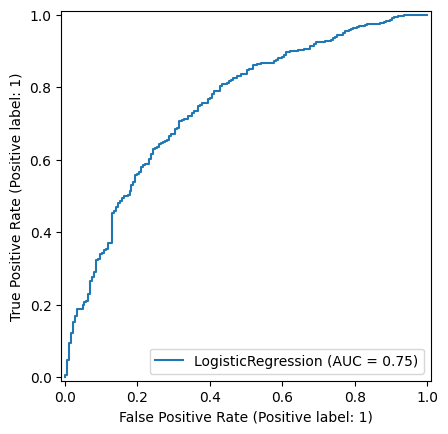

In [ ]:
roc_display = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
roc_display.plot()

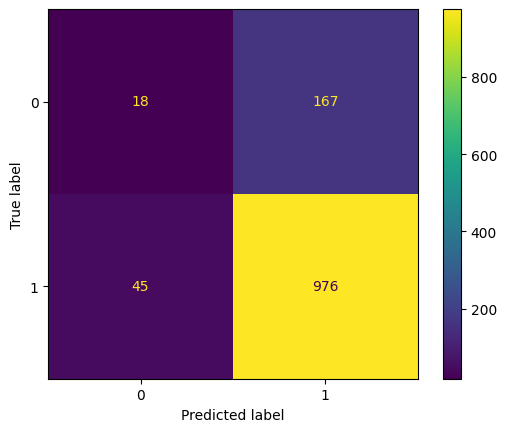

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.29      0.10      0.15       185
           1       0.85      0.96      0.90      1021

    accuracy                           0.82      1206
   macro avg       0.57      0.53      0.52      1206
weighted avg       0.77      0.82      0.79      1206



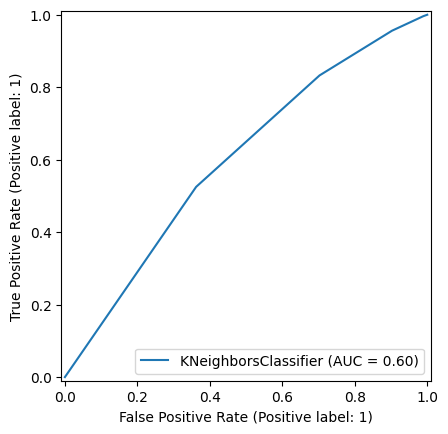

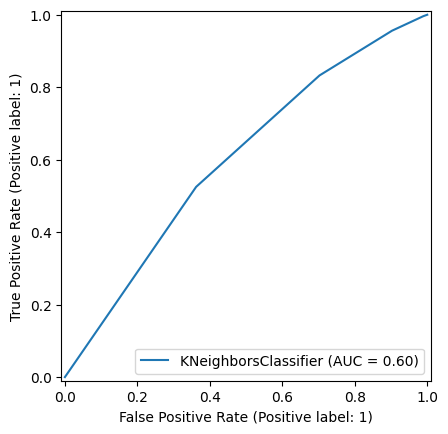

In [ ]:
roc_display_knn = RocCurveDisplay.from_estimator(knn, X_test, y_test)
roc_display_knn.plot()

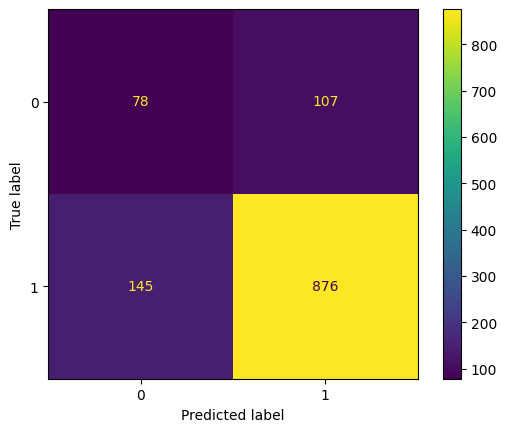

In [ ]:
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(cm_nb)
disp_nb.plot()

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.35      0.42      0.38       185
           1       0.89      0.86      0.87      1021

    accuracy                           0.79      1206
   macro avg       0.62      0.64      0.63      1206
weighted avg       0.81      0.79      0.80      1206



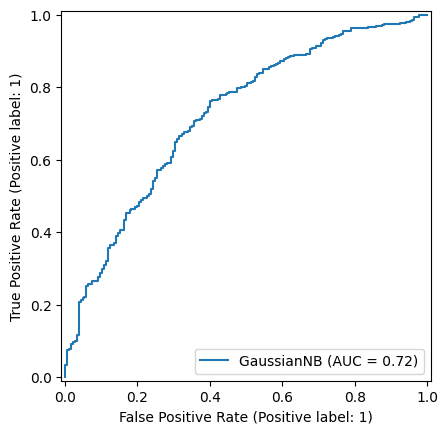

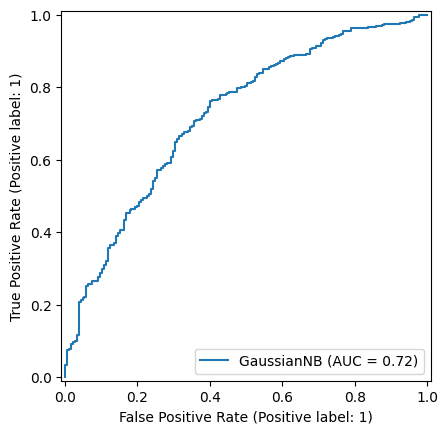

In [ ]:
roc_display_nb = RocCurveDisplay.from_estimator(nb, X_test, y_test)
roc_display_nb.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


# Scale the features and do grid search
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=500))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(pipeline, param_grid_lr, cv=3, scoring='f1_macro')
grid_lr.fit(X_train, y_train)

print("Best parameters:", grid_lr.best_params_)
best_lr_model = grid_lr.best_estimator_

Best parameters: {'lr__C': 0.01, 'lr__solver': 'liblinear'}


In [ ]:
# Predict
y_pred_After = grid_lr.predict(X_test)
y_proba_After = grid_lr.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_After))
print("Recall:", recall_score(y_test, y_pred_After))
print("Precision:", precision_score(y_test, y_pred_After))
print("F1 Score:", f1_score(y_test, y_pred_After))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_After))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_After))

Accuracy: 0.8466003316749585
Recall: 0.9764936336924583
Precision: 0.8609671848013817
F1 Score: 0.9150986691142726
AUC-ROC: 0.748841887921222
Confusion Matrix:
 [[ 24 161]
 [ 24 997]]


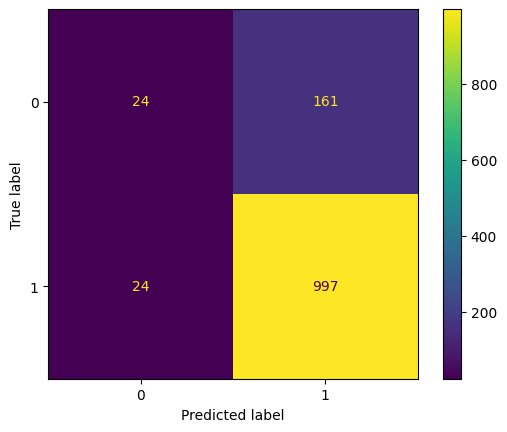

In [ ]:
cm = confusion_matrix(y_test, y_pred_After, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred_After))

              precision    recall  f1-score   support

           0       0.50      0.13      0.21       185
           1       0.86      0.98      0.92      1021

    accuracy                           0.85      1206
   macro avg       0.68      0.55      0.56      1206
weighted avg       0.81      0.85      0.81      1206

